In [9]:
import numpy as np
X = 2*np.random.rand(100,1)
y = 4+3*X+np.random.randn(100,1)

In [10]:
X_b = np.c_[np.ones((100,1)),X]# add x0=1 to leach instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
theta_best

array([[3.96609101],
       [3.04160765]])

In [12]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new ] #add x0=1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.65863446],
       [10.23057693]])

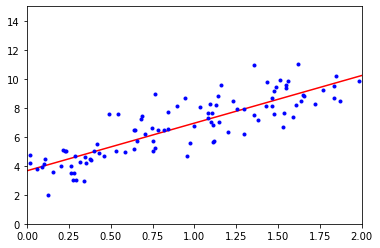

In [14]:
import matplotlib.pyplot as plt
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

In [19]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([3.65863446]), array([[3.28597123]]))

In [20]:
eta = 0.1 #laarning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m *X_b.T.dot(X_b.dot(theta)-y)
    theta = theta -eta * gradients

In [21]:
theta

array([[3.65863446],
       [3.28597123]])

In [32]:
n_epochs = 50
t0,t1 = 5,50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1) #random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradient=  2 * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch * m +1)
        theta = theta-eta*gradients

In [33]:
theta

array([[0.13899769],
       [1.67328532]])

In [34]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50,penalty=None,eta0=0.1)
sgd_reg.fit(X,y.ravel())

D:\anaconda3\envs\mlold\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=50, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [35]:
sgd_reg.intercept_,sgd_reg.coef_

(array([3.63452241]), array([3.26784949]))

In [36]:
m = 100
X = 6*np.random.rand(m,1)-3
y = 0.5*X**2+X+2+np.random.randn(m,1)

In [41]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2,include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([0.63419318])

In [42]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([1.98447277]), array([[0.9948673 , 0.48379248]]))

In [49]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):
    X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2)
    train_errors,val_errors = [],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict,y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict,y_val))
    plt.plot(np.sqrt(train_errors),"r-+",linewidth=2,label="train")
    plt.plot(np.sqrt(val_errors),"b-",linewidth=3,label="val")

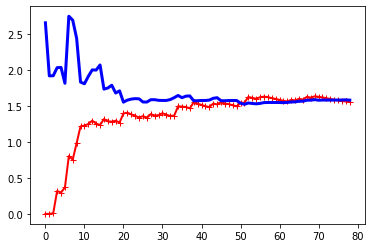

In [50]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y)

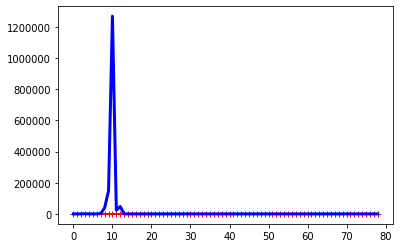

In [56]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((
        ("poly_features",PolynomialFeatures(degree=10,include_bias=False)),
        ("sgd_reg",LinearRegression()),
        ))

plot_learning_curves(polynomial_regression,X,y)

In [57]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1,solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[4.93277719]])

In [64]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

D:\anaconda3\envs\mlold\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([4.13578486])

In [66]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([4.88560354])

In [68]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([4.8841807])

In [87]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())
X = iris["data"][:,3:]#petal width
y = (iris["target"]==2).astype(np.int) #1 if iris-virginica else 0

In [88]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

D:\anaconda3\envs\mlold\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

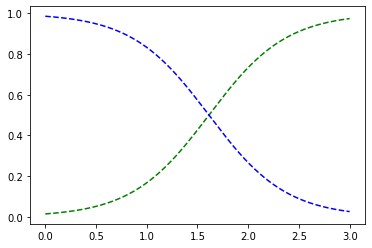

In [95]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new,y_proba[:,1],"g--",label="Iris-Virginica")
plt.plot(X_new,y_proba[:,0],"b--",label="Not Iris-Virginica")
# + more Matplotlib code to make the image look pretty

In [96]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

In [100]:
X = iris["data"][:,(2,3)] #petal lengeth,petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs",C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [101]:
softmax_reg.predict([[5,2]])

array([2])

In [102]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])